In [16]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp
import seaborn as sns
%matplotlib inline

init_notebook_mode(connected=True)

In [5]:
#load in the data

fname1 = 'Uber-Jan-Feb-FOIL.csv'
columns1 = ('dispatching_base_number', 'date', 'active_vehicles', 'trips')
FOIL_df = pd.read_csv(fname1, skiprows=[0], names=columns1)


In [6]:
fname2 = 'Aggregate FHV Data.xlsx'


sheet1 = 'Trips Per Day'
sheet2 = 'Trips Per Hour and Weekday'
sheet3 = 'Change in Trips Sep 2013-2014'
sheet4 = 'Change in Daily Trips by Hour'

FHV_col1 = ('Date', 'American', 'Carmel', 'Dial 7', 'Diplo', 'Firstclass', 'Highclass', 
            'Prestige', 'Skyline', 'Lyft', 'Uber', 'Yellow Taxis', 'Green Taxis')
FHV_col3 = ('Location', 'Uber and Lyft Trips Per Day 2014', 
            'Yellow Taxi Trips Per Day 2014', 'Yellow Taxi Trips Per Day 2013')
FHV_col4 = ('Hour', 'Uber and Lyft Trips in MN Core (Sep 2014)', 
           'Change in Daily Yellow Trips in MN Core (Sep 2014 compared with Sep 2013')

## data key: MN, JFK, LGA
FHV_df1 = pd.read_excel(fname2, sheetname = sheet1, skiprows=[0], names = FHV_col1)
FHV_df3 = pd.read_excel(fname2, sheetname = sheet3, skiprows=[0], names = FHV_col3)
FHV_df4 = pd.read_excel(fname2, sheetname = sheet4, skiprows=[0], names = FHV_col4)

In [7]:
FHV_df1.set_index('Date', inplace=True)

In [8]:
FHV_df1.head()

,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
Date,,,,,,,,,,,,
2014-07-02,1028,2965,2409,1275,2228,1661,3533,1691,0,26480,434416,42472
2014-07-03,1068,3361,2520,1200,2121,1599,3649,1157,0,21597,412980,46046
2014-07-04,1008,2174,1955,1171,1459,1622,3401,337,0,14148,306773,41535
2014-07-05,1214,1846,1371,1371,1703,1898,4081,276,0,10890,305653,46873
2014-07-06,1048,2480,1872,1251,1501,1738,3545,401,0,11443,310376,40354


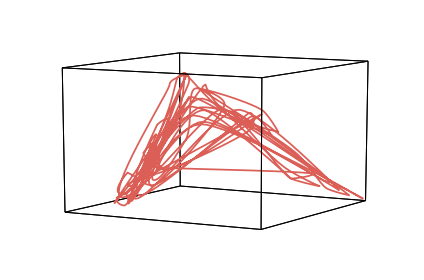

(<matplotlib.figure.Figure at 0x7fae91b91e80>,
 [array([[  1028,   2965,   2409, ...,  26480, 434416,  42472],
         [  1068,   3361,   2520, ...,  21597, 412980,  46046],
         [  1008,   2174,   1955, ...,  14148, 306773,  41535],
         ..., 
         [  1080,   2559,   1949, ...,  29656, 429068,  51832],
         [   772,   3225,   2349, ...,  29201, 396191,  37657],
         [   848,   2824,   2004, ...,  33431, 431354,  38665]])],
 None)

In [9]:
hyp.plot(FHV_df1, model='SpectralEmbedding')

In [10]:
fname3 = 'uber-trip-data/uber-raw-data-apr14.csv'
columns3 = ('Time', 'Lat', 'Lon', 'Base')
april_df = pd.read_csv(fname3, skiprows=[0], names=columns3)

In [11]:
april_df

,Time,Lat,Lon,Base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512
5,4/1/14 0:33,40.7383,-74.0403,B02512
6,4/1/14 0:39,40.7223,-73.9887,B02512
7,4/1/14 0:45,40.7620,-73.9790,B02512
8,4/1/14 0:55,40.7524,-73.9960,B02512
9,4/1/14 1:01,40.7575,-73.9846,B02512


In [12]:
april_df.head()

,Time,Lat,Lon,Base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


In [19]:
trip_paths = []
for i in range(101):
    trip_paths.append(
        dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = [april_df['Lon'][i], april_df['Lon'][i+1] ],
            lat = [ april_df['Lat'][i], april_df['Lat'][i+1] ],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'red',
            ),
            # opacity = float(trip_paths['Time'][i])/float(trip_paths['Time'].max()),
        )
    )
    
layout = dict(
        title = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
        showlegend = False, 
        geo = dict(
            scope='north america',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
    
fig = dict( data= trip_paths, layout=layout )
iplot( fig, filename='april_trips' )
# Copy to clipboard!

## debug by setting for length to 100 or smth
## boundary box
## abstracting bases & time of day hours into functions
## multiple loops to get it all in one graph
